In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
metric = 'AUC'

in_files = { 'nucleosome-sized':'../../delfi_data_cancer_detection/number_of_sites_analysis/logreg_PCA_results/30000-sites_logreg_results/30000-sites.'+metric+'.txt',
            'short-fragment':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/short-fragments_logreg_results/short-fragments.'+metric+'.txt',
            'all-fragments':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/all-fragments_logreg_results/all-fragments.'+metric+'.txt',
           
            'CNA-corrected':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/CNA-corrected_logreg_results/CNA-corrected.'+metric+'.txt',
            
            'DHS':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/DHS_logreg_results/DHS.'+metric+'.txt',
        
            'no-amplitude':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/no-amplitude_logreg_results/no-amplitude.'+metric+'.txt',
            'Ulz':'../../delfi_data_cancer_detection/Ulz_analysis/logreg_PCA_results/Ulz_logreg_results/Ulz.'+metric+'.txt',
                      
            'no-GC-correction':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/uncorrected_logreg_results/uncorrected.'+metric+'.txt',
            'GC-map-corrected':'../../delfi_data_cancer_detection/other_analysis/logreg_PCA_results/GC-map-corrected_logreg_results/GC-map-corrected.'+metric+'.txt',
            'single-length-GC-corr.':'../../Griffin_single_fragment_length/delfi_cancer/griffin_single_fragment_length_nucleosome_profiling/analysis/logreg_PCA_results/single-fragment-length-GC-correction_logreg_results/single-fragment-length-GC-correction.'+metric+'.txt'}


In [3]:
groups = ['I','II','III','IV','overall']

In [4]:
boxplot_data = pd.DataFrame()
analysis_types = list(in_files.keys())

for analysis_type in analysis_types:
    current = pd.read_csv(in_files[analysis_type], sep='\t')
    current = current[groups]
    current['analysis_type'] = analysis_type
    current = current.set_index('analysis_type').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    boxplot_data = boxplot_data.append(current)
    
metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for analysis_type in analysis_types:
    df = boxplot_data[boxplot_data['analysis_type']==analysis_type]
    metrics_df[analysis_type] = np.round(df.groupby('group')[metric].median(),3).astype(str) + ' ('+ \
        np.round(df.groupby('group')[metric].quantile(0.025),3).astype(str) + '-' + \
        np.round(df.groupby('group')[metric].quantile(0.975),3).astype(str) + ')'
#format for table
# metrics_df = np.round(metrics_df,3)
metrics_df.columns = metrics_df.columns 
metrics_df.index = metrics_df.index.str.replace('_',' ')    

print(metric)
metrics_df.loc[groups]

AUC


,nucleosome-sized,short-fragment,all-fragments,CNA-corrected,DHS,no-amplitude,Ulz,no-GC-correction,GC-map-corrected,single-length-GC-corr.
I,0.929 (0.83-0.984),0.922 (0.843-0.976),0.91 (0.771-0.976),0.93 (0.827-0.984),0.811 (0.691-0.914),0.701 (0.542-0.862),0.793 (0.67-0.902),0.804 (0.688-0.911),0.928 (0.831-0.985),0.916 (0.823-0.98)
II,0.931 (0.868-0.968),0.9 (0.826-0.948),0.911 (0.819-0.957),0.921 (0.838-0.964),0.854 (0.789-0.913),0.801 (0.719-0.892),0.805 (0.714-0.875),0.86 (0.788-0.915),0.931 (0.87-0.967),0.934 (0.879-0.968)
III,0.95 (0.863-0.989),0.926 (0.826-0.986),0.933 (0.789-0.981),0.941 (0.832-0.986),0.787 (0.633-0.904),0.694 (0.528-0.85),0.838 (0.704-0.942),0.805 (0.649-0.927),0.95 (0.863-0.989),0.946 (0.865-0.988)
IV,0.988 (0.918-1.0),0.971 (0.899-1.0),0.984 (0.793-1.0),0.987 (0.879-1.0),0.831 (0.668-0.972),0.682 (0.448-0.92),0.903 (0.75-0.988),0.842 (0.653-0.979),0.987 (0.92-1.0),0.985 (0.918-1.0)
overall,0.939 (0.876-0.966),0.914 (0.865-0.95),0.923 (0.814-0.956),0.934 (0.852-0.965),0.83 (0.777-0.879),0.746 (0.671-0.846),0.818 (0.749-0.871),0.834 (0.775-0.889),0.939 (0.879-0.966),0.939 (0.886-0.966)


In [5]:
#https://github.com/mwaskom/seaborn/issues/1076
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if len(l.get_xdata())==2 and np.all(l.get_xdata() == [xmin, xmax]): #modified to prevent element wise comparison failure
                        l.set_xdata([xmin_new, xmax_new])


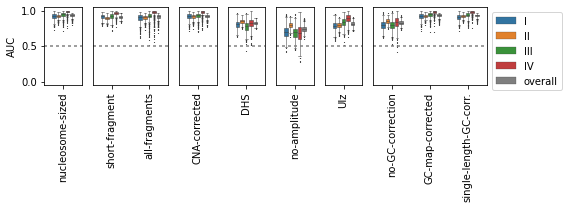

In [6]:
fig = plt.figure(figsize = (8,3))
from matplotlib import gridspec
spec = gridspec.GridSpec(ncols=7, nrows=1,
                         width_ratios=[1,2,1,1,1,1,3])

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])
ax3 = fig.add_subplot(spec[3])
ax4 = fig.add_subplot(spec[4])
ax5 = fig.add_subplot(spec[5])
ax6 = fig.add_subplot(spec[6])

palette = ['tab:blue','tab:orange','tab:green','tab:red','tab:grey']
fliersize = .3

current_groups = ['nucleosome-sized']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax0, fliersize = fliersize, linewidth = .5)


current_groups = ['short-fragment','all-fragments']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax1, fliersize = fliersize, linewidth = .5)

current_groups = ['CNA-corrected']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax2, fliersize = fliersize, linewidth = .5)

current_groups = ['DHS']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax3, fliersize = fliersize, linewidth = .5)

current_groups = ['no-amplitude']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax4, fliersize = fliersize, linewidth = .5)

current_groups = ['Ulz']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax5, fliersize = fliersize, linewidth = .5)

current_groups = ['no-GC-correction','GC-map-corrected','single-length-GC-corr.']
current = boxplot_data[boxplot_data['analysis_type'].isin(current_groups)]
sns.boxplot(x = current['analysis_type'],
            y = current[metric],
            hue = current['group'],
           width = 0.6,
           order = current_groups,
            hue_order = groups,
            palette = palette,
           ax = ax6, fliersize = fliersize, linewidth = .5)


for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.tick_params(left = False, labelleft=False)

    
for ax in [ax0,ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_ylim(-0.05,1.05)
    ax.axhline(0.5,color = 'grey', dashes = [2,2])
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.tick_params(axis = 'x', rotation=90)
    
ax0.set_ylabel(metric)

ax6.legend(bbox_to_anchor = [1,1], loc = 'upper left')
fig.tight_layout()

adjust_box_widths(fig, 0.8)

fig.savefig('plots/other_comparisons_'+metric+'_by_stage.pdf')